<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Price_NSEI%26VIXS%26P500_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price NSEI Analysis with Python

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 43.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=f66d148beea6af879abca51773b0e1bacf641496226ea874f24bee72f1109797
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

In [5]:
nsei = yf.download('^NSEI',
 start='2020-01-01',
 end='2021-09-16',
 progress=False)

In [6]:
nsei.tail(9)

Open          High  ...     Adj Close  Volume
Date                                    ...                      
2021-09-02  17095.400391  17245.500000  ...  17234.150391  242400
2021-09-03  17262.449219  17340.099609  ...  17323.599609  261400
2021-09-06  17399.349609  17429.550781  ...  17377.800781  228000
2021-09-07  17401.550781  17436.500000  ...  17362.099609  243400
2021-09-08  17375.750000  17383.400391  ...  17353.500000  252700
2021-09-09  17312.849609  17379.650391  ...  17369.250000  241500
2021-09-13  17363.550781  17378.349609  ...  17355.300781  241100
2021-09-14  17420.349609  17438.550781  ...  17380.000000  230400
2021-09-15  17387.650391  17532.699219  ...  17519.449219       0

[9 rows x 6 columns]

In [ ]:
nsei.head()

Open          High  ...     Adj Close  Volume
Date                                    ...                      
2020-01-01  12202.150391  12222.200195  ...  12182.500000  304100
2020-01-02  12198.549805  12289.900391  ...  12282.200195  407700
2020-01-03  12261.099609  12265.599609  ...  12226.650391  428800
2020-01-06  12170.599609  12179.099609  ...  11993.049805  396500
2020-01-07  12079.099609  12152.150391  ...  12052.950195  447800

[5 rows x 6 columns]

In [7]:
import matplotlib.pyplot as plt

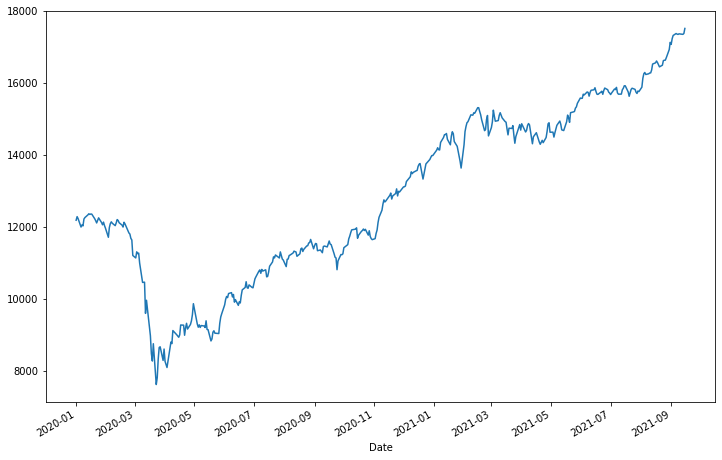

In [8]:
nsei['Close'].plot(figsize=(12,8))

In [9]:
nsei['Volume'].plot(figsize=(12,8))

In [10]:
nsei[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7857d19190>,
      dtype=object)

In [11]:
nsei.describe()

Open          High  ...     Adj Close        Volume
count    423.000000    423.000000  ...    423.000000  4.230000e+02
mean   12882.525523  12959.659321  ...  12871.744085  5.733856e+05
std     2392.711570   2375.248499  ...   2397.980879  2.321291e+05
min     7735.149902   8036.950195  ...   7610.250000  0.000000e+00
25%    11228.100098  11281.250000  ...  11200.950195  4.547500e+05
50%    12347.099609  12385.450195  ...  12352.349609  5.722000e+05
75%    14965.274902  15012.375000  ...  14921.125000  6.843000e+05
max    17420.349609  17532.699219  ...  17519.449219  1.811000e+06

[8 rows x 6 columns]

In [12]:
nsei['simple_rtn'] = nsei.Close.pct_change()

In [13]:
nsei['log_rtn'] = np.log(nsei.Close/nsei.Close.shift(1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7856b793d0>],
      dtype=object)

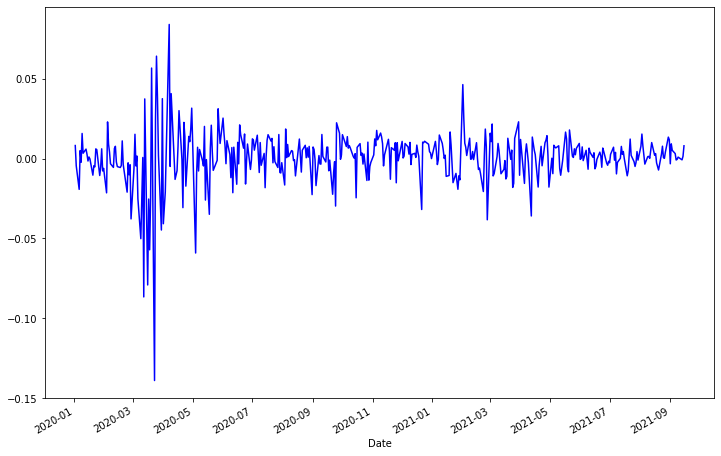

In [14]:
nsei['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [15]:
nsei['log_rtn'].tail(12)

Date
2021-08-30    0.013429
2021-08-31    0.011810
2021-09-01   -0.003271
2021-09-02    0.009204
2021-09-03    0.005177
2021-09-06    0.003124
2021-09-07   -0.000904
2021-09-08   -0.000495
2021-09-09    0.000907
2021-09-13   -0.000803
2021-09-14    0.001422
2021-09-15    0.007992
Name: log_rtn, dtype: float64

In [16]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [17]:
init_notebook_mode()

In [18]:
df_rolling = nsei[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])

In [19]:
df_rolling.columns = df_rolling.columns.droplevel()

In [20]:
df_outliers = nsei.join(df_rolling)

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [23]:
df = yf.download(['^NSEI', '^VIX'],
start='1985-01-01',
end='2021-09-16',
progress=False)

In [24]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^NSEI': 'nsei', '^VIX': 'vix'})

In [25]:
df.tail()

nsei        vix
Date                               
2021-09-09  17369.250000  18.799999
2021-09-10           NaN  20.950001
2021-09-13  17355.300781  19.370001
2021-09-14  17380.000000  19.459999
2021-09-15  17519.449219  18.180000

In [26]:
df['log_rtn'] = np.log(df.nsei / df.nsei.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [27]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'NSEI log returns'),
 Text(0.5, 1.0, 'NSEI vs. VIX ($\\rho$ = -0.21)')]

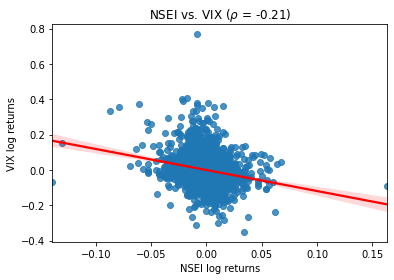

In [28]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'NSEI vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='NSEI log returns')

In [29]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of NSEI returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

In [31]:
df['log_rtn'].tail()

Date
2021-09-03    0.005177
2021-09-08   -0.000495
2021-09-09    0.000907
2021-09-14    0.001422
2021-09-15    0.007992
Name: log_rtn, dtype: float64

In [33]:
df.log_rtn.plot(title='Daily NSEI returns')

In [34]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

In [35]:
acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

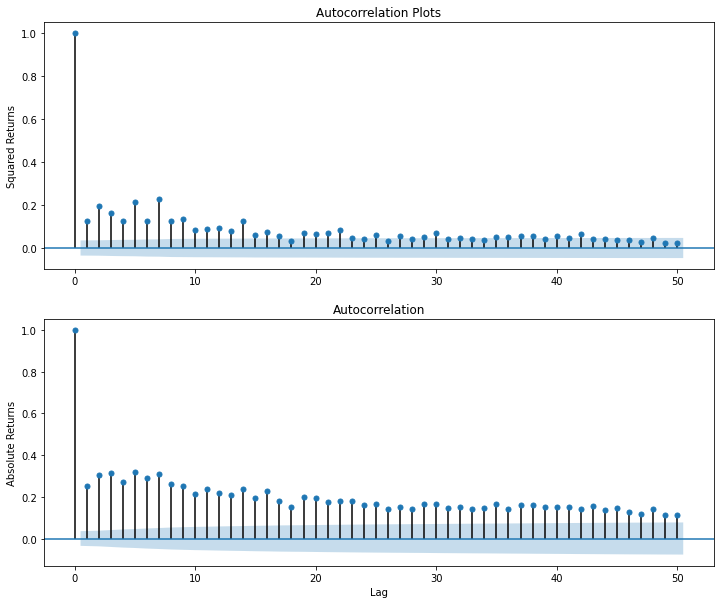

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [37]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

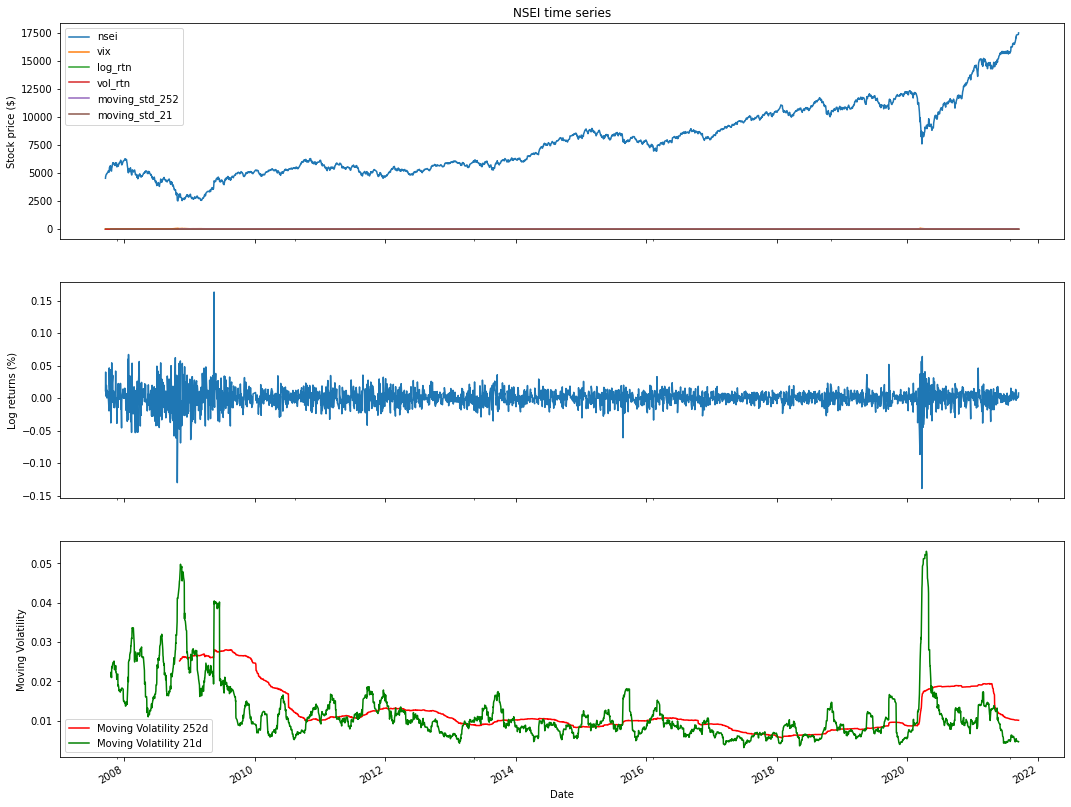

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='NSEI time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()

**Price S&P500 Analysis with Python**

In [ ]:
df = yf.download(['^GSPC', '^VIX'],
start='1985-01-01',
end='2021-07-18',
progress=False)

In [ ]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

In [ ]:
df.tail()

sp500        vix
Date                              
2021-07-12  4384.629883  16.170000
2021-07-13  4369.209961  17.120001
2021-07-14  4374.299805  16.330000
2021-07-15  4360.029785  17.010000
2021-07-16  4327.160156  18.450001

In [ ]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [ ]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'S&P 500 log returns'),
 Text(0.5, 1.0, 'S&P 500 vs. VIX ($\\rho$ = -0.71)')]

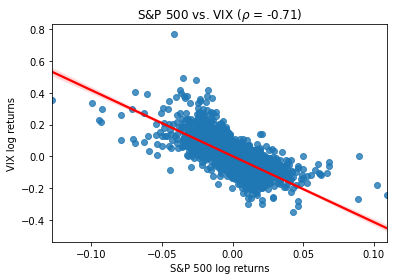

In [ ]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='S&P 500 log returns')

In [ ]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of S%P returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

In [ ]:
df['log_rtn'].tail()

Date
2021-07-12    0.003445
2021-07-13   -0.003523
2021-07-14    0.001164
2021-07-15   -0.003268
2021-07-16   -0.007567
Name: log_rtn, dtype: float64

In [ ]:
df.log_rtn.plot(title='Daily S&P500 returns')

In [ ]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

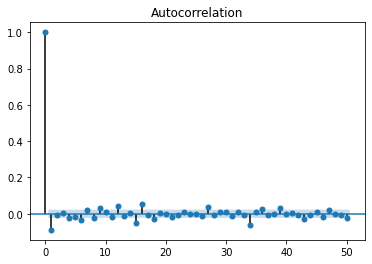

In [ ]:

acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

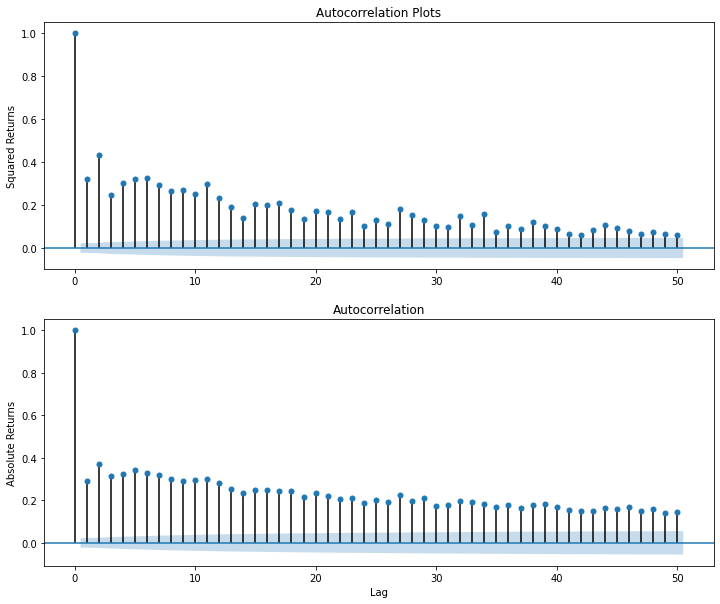

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [ ]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

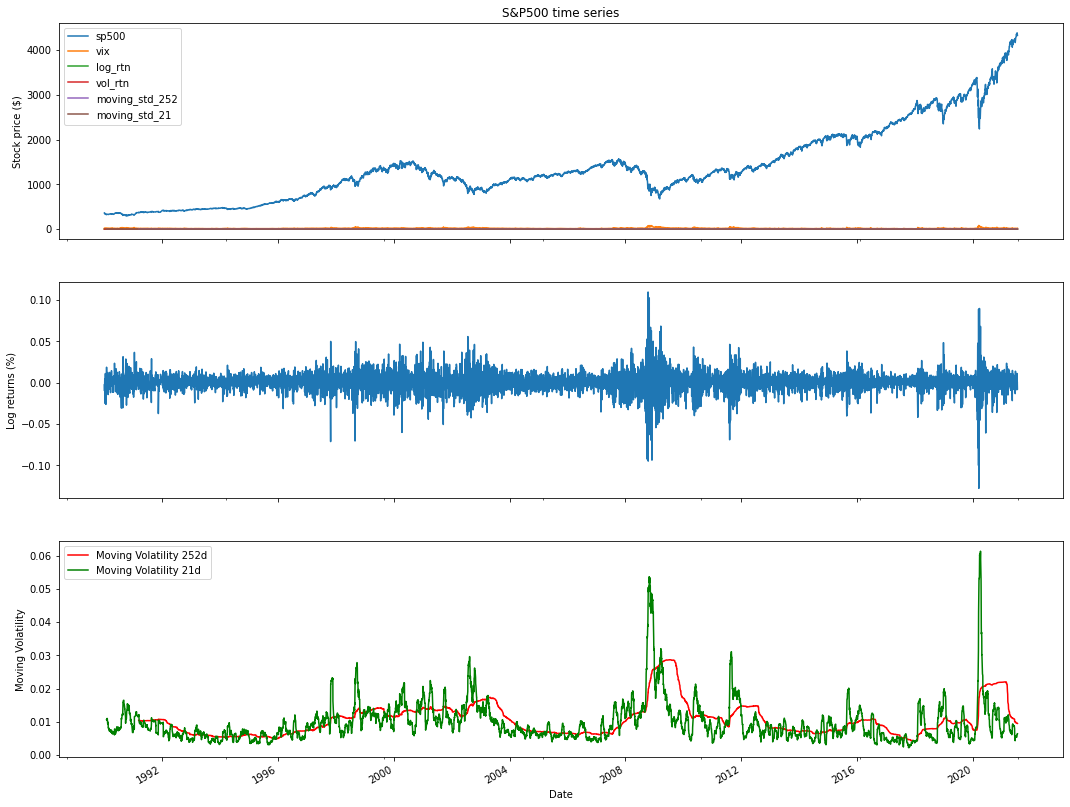

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='S&P500 time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()